# SUSA PyTorch Workshop
## 11/28/18

### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Originally authored by [Calvin Chen](mailto:chencalvin99@berkeley.edu), [Samyak Parajuli](mailto:samyak.parajuli@berkeley.edu), and [Johann Sun](mailto:sunjohann@berkeley.edu).

### Table of Contents
* [What is PyTorch](#what_is_pytorch)
    * [Installing PyTorch](#installing_pytorch)
    * [Advantages of PyTorch](#advantages_of_pytorch)
* [Similarities to Numpy](#similarities_to_numpy)
* [GPU](#gpu)
* [Classification vs Regression](#class_vs_regress)
    * [Recap on Regression](#regress_recap)
    * [Some Intuition on Classification](#intuition)
        * [Real World Example](#real_world_example)
* [k-Nearest Neighbors](#knn)

<a id='what_is_pytorch'></a>
# What is PyTorch?

PyTorch is a library made for the Python programming language as a platform on which to develop deep learning projects and applications. Released in Januuary 2016, it has gained fame for being able to create neural networks with relative ease. Before diving directly into PyTorch, it's important to understand the definition of a deep learning platform, deep learning, neural networks, and how they're connected. In a general sense, Deep Learning is a subset of Machine Learning, which is a subset of the large sphere of Artifical Intelligence.

![title](img/ai_subsets.jpeg)

So, PyTorch would lie somewhere in the most inner circle of the graphic above, as a platform for people to develop Deep Learning models off of. 

Now, you might be interested in different applications of Neural Networks, and here's a couple that we found that were pretty cool!

[Celebrity Faces](https://www.youtube.com/watch?v=36lE9tV9vm0)

[Atari Breakout](https://www.youtube.com/watch?v=V1eYniJ0Rnk)

To kick things off, we'll begin with downloading PyTorch and getting into the differences between it and other libraries that exist out there!

<a id='installing_pytorch'></a>
## Installing Pytorch

Please install the correct version of Pytorch corresponding to your OS here: [PyTorch](https://pytorch.org/)

Now that you've got PyTorch downloaded, let's get into why it's useful, and how it differs from other platforms/packages that do similar things to it out there!

<a id='advantages_of_pytorch'></a>
## Advantages of PyTorch

Simple Interface: It offers easy to use API, thus it is very simple to operate and run like Python.
Pythonic in nature: This library, being Pythonic, smoothly integrates with the Python data science stack. Thus it can leverage all the services and functionalities offered by the Python environment.
Computational graphs: In addition to this, PyTorch provides an excellent platform which offers dynamic computational graphs, thus you can change them during runtime. This is highly useful when you have no idea how much memory will be required for creating a neural network model.

So what are the features of PyTorch that makes it so great? Here's a few of the main advantages that PyTorch holds over other Deep Learning platforms (like TensorFlow):
* **Built specifically for Python**
    * Integrates really smoothly with different Python packages (data visualization)
    * Good debugging environment- can just introduce different debugging packages in Python and they integrate smoothly
* **Imperative**
    * Uses statements to continuously change the program's state
    * Does not require for frameworks of code to be developed before being execute; executes on the fly
* **Dynamic Computation Graph**
    * Defined and manipulated as you code, as compared to static, where you define the graph before you run the model
    * Really useful with dynamic inputs- static graphs can only have static input sequences!
        * For RNNs, it's incredibly useful to have a dynamic computation graph, as inputs might change in structure over time (we'll get into more of RNNs later and why this is useful!)
* **Declarative Data Parallelism**
    * Easy to call torch.nn.DataParallel to wrap different modules and split samples into subsets to run computation for these subsets in parallel (provides for better efficiency and speed, and minimal effort to set up)

Now that we've been able to see the advantages/specifics of PyTorch from a high level, let's take a look at its implementation in code and how it compares with another famous package in Python- Numpy!

<a id='similarities_to_numpy'></a>
# Similarities to Numpy

Before we can get into any of the coding, we'll need to define what a tensor is in its relation to Deep Learning and coding!

To define it generally, a tensor is a basically just an $n$ dimensional object (scalar, vector, matrix). What this means is that a rank 0 tensor can be represented with a 0-dimensional object (a scalar), a rank 1 tensor can be represented with a 1-dimensional object (vector), and a rank 2 tensor can be represented with a 2-dimensional object (matrix). **However, this does not mean that these objects can be represented as tensors!** Tensors have special properties that make them useful in Deep Learning, one being that they're flexible in structure and can take on any arbitrary rank.

Another implication with tensors that make them more useful than just vectors or matrices in Deep Learning models are how they can be **variable with relation to the other entities around them**. For example, if you wanted a model to maintain consistent weights despite the fact that different inputs may be transformed, tensors would be able to be replaced with the scalar weights to be able to sustain different transformations while not impacting the outputs!

Now, these definitions/usages for tensors may be confusing, but we just wanted to give you a brief glimpse into why it's more useful than just using objects with static dimensions. For the purposes of this notebook, it'll be sufficient to just interpret tensors as "arrays", but just know that there are key differences between the two. If you're interested in learning more about the differences between the two, click [here](https://medium.com/@quantumsteinke/whats-the-difference-between-a-matrix-and-a-tensor-4505fbdc576c) to learn more!

But enough with all the definitions and English- let's get into coding!

In [36]:
import numpy as np
import torch

In [37]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [40]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [41]:
np.random.rand(5,3)

array([[0.96498995, 0.26053359, 0.53001272],
       [0.56542759, 0.21948031, 0.10098997],
       [0.66028063, 0.34336957, 0.58764673],
       [0.49277861, 0.32095331, 0.42830881],
       [0.37064033, 0.62725371, 0.19902255]])

In [42]:
torch.rand((5, 3))

tensor([[0.0542, 0.2257, 0.3019],
        [0.3522, 0.7485, 0.2319],
        [0.5271, 0.4625, 0.5110],
        [0.9013, 0.1109, 0.3437],
        [0.6411, 0.3683, 0.0146]])

In [43]:
A = torch.eye(3)
A.add(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [17]:
A

tensor([[3., 2., 2.],
        [2., 3., 2.],
        [2., 2., 3.]])

In [14]:
t1 = torch.ones(2, 2)
t2 = torch.ones(2, 2)
t = t1 + t2
t

tensor([[2., 2.],
        [2., 2.]])

In [15]:
A = torch.eye(3)
A.add(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [16]:
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Underscore means inplace operation

In [15]:
A.add_(1)

tensor([[3., 2., 2.],
        [2., 3., 2.],
        [2., 2., 3.]])

In [16]:
A

tensor([[3., 2., 2.],
        [2., 3., 2.],
        [2., 2., 3.]])

#### Converting from Pytorch to Numpy

Converting from numpy to torch, allows us to build upon existing architecture

In [22]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [23]:
A.numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [24]:
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

<a id='gpu'></a>
# GPU

GPUs have many processing units but limited memory. Also, they can only use data in their own memory, not in the CPU's memory, so one must transfer data back 
and forth between the CPU and the GPU. This copying can, in some computations, constitute a very large fraction of the overall 
computation. So it is best to create the data and/or leave the data (for subsequent calculations) on the GPU when possible and to limit transfers.

In [45]:
#If you have a GPU you should get something like:  device(type='cuda', index=0)
#You can move data to the GPU by doing .to(device)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [47]:
data = torch.eye(3)
data.to(device)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

<a id='liner_regression_example'></a>
# Linear Regression example

In [18]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

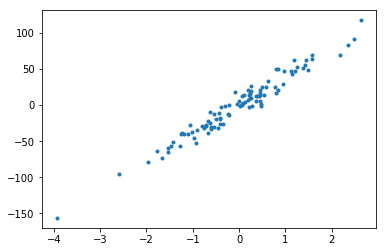

In [19]:
n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=10,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".");

In [137]:
w = 1  # a random guess: random value

# our model forward pass

def forward(x):
    return x * w

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

# compute gradient
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x * w - y)

# Training loop
for epoch in range(10):
    for x_val, y_val in zip(X, y):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        #print("\tgrad: ", X, y, np.round(grad, 2))
        l = loss(x_val, y_val)

# After training
y_ = forward(X)
#print(y_)

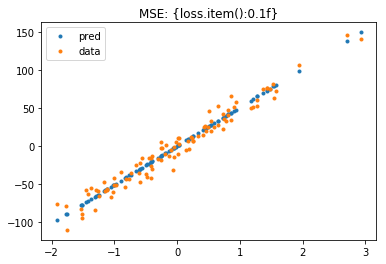

In [138]:
# Vis
fig, ax = plt.subplots()
ax.plot(X, y_, ".", label="pred")
ax.plot(X, y, ".", label="data")
ax.set_title("MSE: {loss.item():0.1f}")
ax.legend();

<a id='auto_grad'></a>
# Autograd

Every Tensor has a flag: requires_grad that allows for fine grained exclusion of subgraphs from gradient computation and can increase efficiency

In [25]:
w = torch.ones(1)
w.requires_grad

False

In [26]:
type(w)

torch.Tensor

In [27]:
z = torch.ones(1) * 2
z.requires_grad

False

In [28]:
total = w + z
total

tensor([3.])

In [29]:
total.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
w = torch.ones(1, requires_grad=True)
w.requires_grad

In [ ]:
total = w**2 + z
total.requires_grad

In [ ]:
w

In [ ]:
total.backward()

In [30]:
print(w.grad)

None


In [31]:
with torch.no_grad():
    total = w + z

total.requires_grad

False

<a id='linear_regression_pytorch'></a>
# Linear Regression (Pytorch Way)

In [27]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [28]:
from torch import nn
from torch import optim

class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        self.beta.weight.data.fill_(1)

        
    def forward(self, X):
        return self.beta(X)

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LinReg(n_features).to(device)  # <-- Calculations will happen on the GPU
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

X, y = X.to(device), y.to(device)

In [30]:
# Train step
for _ in range(10):
    model.train() # Puts model in train mode
    optimizer.zero_grad() # Need to null the gradient, otherwise it will accumulate over time

    y_ = model(X) # Pass data into model and get prediction
    loss = criterion(y_, y) # calculate mse loss
    loss.backward() # Calculate gradients
    optimizer.step() # Update the parameter

# Eval
model.eval()
with torch.no_grad(): #<- Not interested in gradients
    y_ = model(X)    

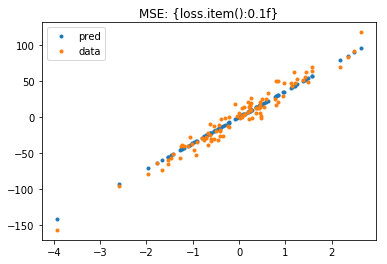

In [31]:
# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title("MSE: {loss.item():0.1f}")
ax.legend();

<a id='neural_network'></a>
# Neural Network Implementation with MNIST

In [32]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        ...
        return

    def forward(self, x):
        ...
        return


model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += criterion(output, target).data[0]
        # get the index of the max
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()

Processing...
Done!
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303662


/Users/calvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [640/60000 (1%)]	Loss: 2.303379
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.298976
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.302488
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.301148
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.306086
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.307215
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.300955
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.310881
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.293291
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.290688
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.319289
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.303837
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.302586
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.308828
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.305709
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.307690
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.283756
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.300191
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.300406
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.284857
Train Epoch: 1 [13440/60

/Users/calvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/Users/calvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0231, Accuracy: 5073/10000 (50%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.474696
Train Epoch: 2 [640/60000 (1%)]	Loss: 1.392233
Train Epoch: 2 [1280/60000 (2%)]	Loss: 1.454554
Train Epoch: 2 [1920/60000 (3%)]	Loss: 1.255085
Train Epoch: 2 [2560/60000 (4%)]	Loss: 1.281534
Train Epoch: 2 [3200/60000 (5%)]	Loss: 1.360458
Train Epoch: 2 [3840/60000 (6%)]	Loss: 1.215719
Train Epoch: 2 [4480/60000 (7%)]	Loss: 1.149964
Train Epoch: 2 [5120/60000 (9%)]	Loss: 1.196114
Train Epoch: 2 [5760/60000 (10%)]	Loss: 1.048898
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.227630
Train Epoch: 2 [7040/60000 (12%)]	Loss: 1.057390
Train Epoch: 2 [7680/60000 (13%)]	Loss: 1.021081
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.983530
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.965556
Train Epoch: 2 [9600/60000 (16%)]	Loss: 1.021137
Train Epoch: 2 [10240/60000 (17%)]	Loss: 1.058683
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.848543
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.990776
Train Epoch: 2 [12

Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.511405
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.223189
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.701777
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.528075
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.288683
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.142821
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.408141
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.287572
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.391583
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.311254
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.501940
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.421191
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.343120
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.314155
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.333909
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.149923
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.290528
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.238668
Train Epoch: 3 [56960/60000 (95%)]	Loss: 0.426421
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.523035


Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.128302
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.112098
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.175625
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.167498
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.279384
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.162030
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.322968
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.328161
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.161203
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.373350
Train Epoch: 5 [35840/60000 (60%)]	Loss: 0.329837
Train Epoch: 5 [36480/60000 (61%)]	Loss: 0.177063
Train Epoch: 5 [37120/60000 (62%)]	Loss: 0.191305
Train Epoch: 5 [37760/60000 (63%)]	Loss: 0.139932
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.141715
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.238406
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.070460
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.174106
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.395708
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.131053


Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.148235
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.211220
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.083867
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.122764
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.303161
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.068525
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.058306
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.189825
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.119065
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.036156
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.080072
Train Epoch: 7 [21760/60000 (36%)]	Loss: 0.247375
Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.177764
Train Epoch: 7 [23040/60000 (38%)]	Loss: 0.130488
Train Epoch: 7 [23680/60000 (39%)]	Loss: 0.089504
Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.309280
Train Epoch: 7 [24960/60000 (42%)]	Loss: 0.190800
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.194975
Train Epoch: 7 [26240/60000 (44%)]	Loss: 0.101764
Train Epoch: 7 [26880/60000 (45%)]	Loss: 0.205628



Test set: Average loss: 0.0019, Accuracy: 9638/10000 (96%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.042091
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.169063
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.054292
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.076223
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.044938
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.095735
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.019393
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.037480
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.133734
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.254806
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.062172
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.089260
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.039551
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.101365
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.064731
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.136905
Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.042417
Train Epoch: 9 [10880/60000 (18%)]	Loss: 0.089013
Train Epoch: 9 [11520/60000 (19%)]	Loss: 0.203547
Train Epoch: 9 [12

<a id='data_loader'></a>
# Data Loader

Now, as you might have noticed with the above implementations of the models, we use something called **data loaders**. Data loaders are different tools/pieces of code that enable us to be able to load our data into our model without having to run the computation on all our data points all at once (saving memory and computational load). Data loaders are also not something specific to PyTorch, but the reason why we introduce them today is because data loaders are incredibly intuitive and efficient to use with PyTorch's implementation!

When you inherit from PyTorch's data loader class, you are able to inherit from all the different "workers" (GPUs), the different techniques of optimization, and random shuffling from the class, enabling you to load in your data more efficiently. But in order for you to use PyTorch's data loaders, you first need to define different methods for the data itself (we don't do that in our models because they're built in MNIST, but in practice, other datasets may need to have a different class/methods defined in order to work properly).

Let's take a look at a visual to see more of what we're talking about!

<img src="img/data-loader.jpg" width='800'>

Now, in order to actually implement the `train_loader` from above, we need to be able to define an object class that has the following methods:
* init
* len
* getitem

That way, when we load this class into PyTorch's dataloader method, we're able to convert the dataset into a generator that can be iterated through to obtain all the different data points. Here's some sudocode of what the different methods and their implemenetation looks like!

In [25]:
from torch.utils.data import Dataset, DataLoader

In [26]:
class SuperDuperCoolDataset(Dataset):
    """This is for the SuperDuperCool dataset."""
    
    # Initialize your data, download, etc.
    def __init__(self):
        ...
        return
    
    # Return one item on the index
    def __getitem(self, index):
        ...
        return
    
    # Return the data length
    def __len__(self):
        ...
        return
    
dataset = SuperDuperCoolDataset()
train_loader = DataLoader(dataset=dataset,
                         batch_size=32,
                         shuffle=True,
                         num_workers=2)

<a id='debugging'></a>
# Debugging

In [214]:
from IPython.core.debugger import Pdb
debugger = Pdb()

h(help): Print help

n(ext): Continue execution until the next line in the current function is reached or it returns.

s(tep): Execute the current line, stop at the first possible occasion (either in a function that is called or in the current function).

r(eturn): Continue execution until the current function returns.

a(rgs): Print the argument list of the current function.

In [215]:
def my_function(x):
    answer = 42
    #debugger.set_trace()
    answer += x
    return answer

my_function(12)

54

In [213]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3, 1)
    
    def forward(self, X):
        #set_trace()
        x = self.lin(X)
        return X

    
model = MyModule()
y = model(X)

#assert y_.shape == (5, 1), y_.shape

NameError: name 'X' is not defined

<a id='convolutional_neural_network'></a>
# Convolutional Neural Network implementation using MNIST

In [82]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

<a id='recurrent_neural_networks'></a>
# Recurrent Neural Networks

In other types of neural networks, we make the assumption that all inputs are independent of each other, but many real life situations involve outputs that are dependent of the output before it.

<a id='core_ideas'></a>
## Core Ideas

1. Allow us to operate over sequences of vectors (in the input and the output) as opposed to normal feed-forward neural networks and convolutional neural networks which require fixed length vectors.
2. Are effective in representing conditional memory - next output is determined from the one before (temporal dependencies).

<a id='applications'></a>
## Applications

![title](img/sequences.png)

One to many - Image captioning <br>
Many to one - Sentiment classification <br>
Many to many - Translation (sequence of words -> sequence of words) <br>
Many to many (one to one correspondence between input and output) - Video classification on frame level <br>

<a id='how_rnns_work'></a>
# How RNNs Work

<a id='recurrent_neuron'></a>
### Recurrent Neuron
![title](img/recurrentneuron.png)

<a id='recurrence_relation'></a>
### Recurrence Relation
Each "cell" has an internal state that gets updated with each input: <br>
$$ \text{RNN cell:} h_t = \phi(W_R * h_{t-1} + W_I * x_t + b_h)$$ 
 $$ \text{Linear Layer:} \hat{y_t} = g_y(W_{y} * h_t + b_y) $$
$ h_t $ = new state <br>
$ \phi $ = Some activation function <br>
$ W_{R} $ = Matrix of weights connecting hidden layer to hidden layer <br>
$ h_{t-1} $ = Previous hidden state <br>
$ W_{I} $ = Matrix of weights connecting input layer to hidden layer <br>
$ x_t $ = Input vector at time step t <br>
$ b_h $ = Bias vector for hidden layer <br>
$ \hat{y_t} $ = Predicted vector for time step t <br>
$ y_t $ = Actual vector for time step t <br>
$ g_y $ = Function to get normalized probabilities, softmax $(\frac {e^{f_k}}{
\sum_{j} e^{f_j}})$<br>
$ W_{Y} $ = Matrix of weights connecting hidden layer to output layer <br>
$ b_y $ = Bias vector for output layer <br>


<a id='computation_graph_unrolled'></a>
### Computation Graph Unrolled
![title](img/unrolled.png) <br>
You can think of the hidden state as the the “memory” of the network. It is calculated based on the previous hidden state and the input at the current step.

<a id='backpropagation_through_time'></a>
### Backpropagation Through Time
![title](img/cost_unrolled.png) <br>
We define our cost function to be cross entropy:
$$ C(y, \hat{y}) = - \sum_{t} y_t \log{\hat{y}_t}$$
Backpropagation Through Time is the application of backpropagation  but after the network has been unrolled for all input timesteps. The key difference is that we sum up the gradients for the parameter at each time step. In a traditional neural network we don’t share parameters across layers, so we don’t need to sum anything. <br>

We proceed by calculating the gradients of the cost with respect to our parameters $W_I$, $W_R$ and $W_y$ <br>
Using the cost at time step 2 as an example: <br>
Calculating the gradient for $W_y$ only depends on the values at the current time step <br>
$$\frac{\partial C_2}{\partial W_y} =  \frac{\partial C_2}{\partial \hat{y}_2} * \frac{\partial \hat{y}_2}{\partial h_2} * \frac{\partial h_2}{\partial W_y} $$ <br>
We do the same thing with $W_R$:
$$ \frac{\partial C_2}{\partial W_R} = \frac{\partial C_2}{\partial \hat{y}_2} * \frac{\partial \hat{y}_2}{\partial h_2} * \frac{\partial h_2}{\partial W_R} $$ <br>
However, $h_2 = \phi(W_R * h_1 + W_I * x_t + b_h)$ which depends on $h_1$ and thus $W_R$. Therefore, we cannot treat $h_2$ as a constant. $W_R$ is used in every step of the output, so we need to backpropagate gradients from t=2 all the way to t=0.
$$ \frac{\partial C_2}{\partial W_R} = \sum_{t=0}^2 \frac{\partial C_2}{\partial \hat{y}_2} * \frac{\partial \hat{y}_2}{\partial h_2} * \frac{\partial h_2}{\partial h_t} * \frac{\partial h_t}{\partial W_R} $$<br>
The same reasoning applies for $W_I$

<a id='vanishing/exploding_gradient'></a>
# Vanishing/Exploding Gradient Problem
This idea of propagating all the way to time = 0 introduces the issue of vanishing or exploding gradients. The magnitude of the update for the weight matrix is going to scale with the size of weight matrices:
$$ \frac{\partial C_T}{\partial W_R} \propto |W_R|^T * |\frac{\partial \hat{y}}{\partial h}|^T $$
<br>
If the recurrent weight is less than 1, then if you want to calculate the gradient at t=100, it will ne nearly 0. Alternatively, if $W_R$ is greater than 1, you will run into the problem of exploding gradients. 

<a id='rnn_extensions'></a>
# RNN Extensions

Over the years researchers have developed more sophisticated types of RNNs to deal with some of the shortcomings of the vanilla RNN model.
Two of the most popular that deal with the  vanishing/exploding gradient problem while still tracking long-term dependencies effectively are the LSTM and GRU Cells.

<a id='basic_nlp'></a>
# Basic NLP

Vocablary - set of unique words in your text

![title](img/vocabulary.png)

<a id='representation'></a>
## Representation

We can choose to one hot encode our vectors, however these matrices would be very sparse and have no meaning.

![title](img/onehot.png)

Word embeddings are learned from the corpus we're training on and provide a dense representation of our data with meaning based off of context - the words around it.

![title](img/embeddingvectors.png)

<img src="img/vectormath.png" width="500" height="500">


![title](img/embeddings.png)

Instead of training your own word embedding layer, you can also use pretrained ones such as Word2Vec and Glove

<a id='model_dimensions'></a>
# Model Dimensions

These our what our batches will look like

![title](img/batches.png)

Our input to the RNN will have shape time steps x batch size x embedding and our output will have shape time steps x batch size x vocabulary size

![title](img/output.png)

Basically our output will represent the probability of the next word from our vocabulary

b: batch size

e: embedding size

v: vocabuary size

h: size of hidden state

![title](img/dimensions.png)

<a id='shakespeare_generation'></a>
# Shakespeare Generation

In [50]:
import os
import torch

class Dictionary(object):
    ''' Represents our Vocabulary.'''
    def __init__(self):
        self.word2idx = {} #Map of words to indices, convert word into its index in vocabulary
        self.idx2word = [] #List of all words, can look up word by index

    def add_word(self, word):
        if word not in self.word2idx:
            self.idx2word.append(word)
            self.word2idx[word] = len(self.idx2word) - 1
        return self.word2idx[word]

    def __len__(self):
        return len(self.idx2word)

class Corpus(object):
    def __init__(self, path):
        self.dictionary = Dictionary()
        #Converting ASCII for characters we want (limited to those in english language)
        self.whitelist = [chr(i) for i in range(32, 127)]
        
        self.train = self.tokenize(os.path.join(path, 'train.txt'))
        self.valid = self.tokenize(os.path.join(path, 'valid.txt'))

    def tokenize(self, path):
        '''Takes the text file and breaks it up into its individual word.'''
        assert os.path.exists(path)
        # Add words to the dictionary
        with open(path, 'r',  encoding="utf8") as f:
            tokens = 0
            for line in f:
                line = ''.join([c for c in line if c in self.whitelist])
                words = line.split() + ['<eos>']
                tokens += len(words)
                for word in words:
                    self.dictionary.add_word(word)

        # Tokenize file content
        with open(path, 'r',  encoding="utf8") as f:
            ids = torch.LongTensor(tokens)
            token = 0
            for line in f:
                line = ''.join([c for c in line if c in self.whitelist])
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2idx[word]
                    token += 1

        return ids

In [51]:
corpus = Corpus('./data/shakespeare')

In [52]:
print(corpus.dictionary.idx2word[47])
print(corpus.dictionary.word2idx['famine'])

famine
47


In [63]:
#Number of unique words
vocab_size = len(corpus.dictionary)
vocab_size

74010

In [10]:
#Number of total words
print(corpus.train.size())
print(corpus.valid.size())

torch.Size([1039900])
torch.Size([63420])


In [61]:
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
class RNNModel(nn.Module):

    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, dropout):
        
        super(RNNModel, self).__init__()
        #Embedding layer going from our vocabulary size to defined embedding size
        self.encoder = nn.Embedding(vocab_size, embed_size) 
        #Add dropout layer to prevent overfitting - randomly zero some neurons
        self.drop1 = nn.Dropout(dropout)
        self.drop2 = nn.Dropout(dropout)
        self.rnn = nn.GRU(embed_size, hidden_size, num_layers, dropout=dropout)
        self.decoder = nn.Linear(hidden_size, vocab_size)

        self.init_weights()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

    def init_weights(self):
        initrange = 0.1
        #Sample from Uniform distribution
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.fill_(0)
        self.decoder.weight.data.uniform_(-initrange, initrange)
    
    def forward(self, input, hidden):
        emb = self.drop1(self.encoder(input))
        #Pass in current batch and hidden input from previous timestep
        output, hidden = self.rnn(emb, hidden)
        output = self.drop2(output)
        decoded = self.decoder(output.view(output.size(0)*output.size(1), output.size(2)))
        # Reshape output to be time steps x batch size x vocabulary size
        return decoded.view(output.size(0), output.size(1), decoded.size(1)), hidden

    def init_hidden(self, batch_size):
        #Gives weights of all the paraemters with everything initialized to 0
        weight = next(self.parameters()).data
        return Variable(weight.new(self.num_layers, batch_size, self.hidden_size).zero_())

In [54]:
def batchify(data, batch_size):
    # Find out how many batches we have from our corpus
    nbatch = data.size(0) // batch_size
    # Return narrow version of tensor that has integer mutiple of batch_siz
    data = data.narrow(0, 0, nbatch * batch_size)
    # Reshape and transpose the data so that it is nbatch x batch_size
    data = data.view(batch_size, -1).t().contiguous()
    if torch.cuda.is_available():
        data = data.cuda()
    return data

In [55]:
dummy_data = "Once upon a time there was a good king and a queen"
dummy_data_idx = [corpus.dictionary.word2idx[w] for w in dummy_data.split()]
dummy_tensor = torch.LongTensor(dummy_data_idx) 
op = batchify(dummy_tensor, 2)
for row in op:
    print("%10s %10s" %  (corpus.dictionary.idx2word[row[0]], corpus.dictionary.idx2word[row[1]]))

      Once          a
      upon       good
         a       king
      time        and
     there          a
       was      queen


In [57]:
bs_train = 20       # batch size for training set
bs_valid = 10       # batch size for validation set
bptt_size = 35      # number of times to unroll the graph for back propagation through time
clip = 0.25         # gradient clipping to check exploding gradient

embed_size = 200    # size of the embedding vector
hidden_size = 200   # size of the hidden state in the RNN 
num_layers = 2      # number of RNN layers to use
dropout_pct = 0.5   # %age of neurons to drop out for regularization

In [58]:
train_data = batchify(corpus.train, bs_train)
val_data = batchify(corpus.valid, bs_valid)

In [59]:
#20 sequences of 51995
train_data.shape

torch.Size([51995, 20])

In [64]:
model = RNNModel(vocab_size, embed_size, hidden_size, num_layers, dropout_pct)

In [18]:
criterion = nn.CrossEntropyLoss()

In [65]:
def get_batch(source, i):
    seq_len = min(bptt_size, len(source) - 1 - i)
    data = Variable(source[i:i+seq_len])
    target = Variable(source[i+1:i+1+seq_len].view(-1))
    if torch.cuda.is_available():
        data = data.cuda()
        target = target.cuda()
    return data, target

In [66]:
data, target = get_batch(train_data, 1)

In [67]:
#20 sequences of 35 words
data.size()

torch.Size([35, 20])

In [22]:
#Next 20 * 35 words in our corpus
target.shape

torch.Size([700])

In [70]:
# for sequence in data.t():
#     print("New Sequence ----")
#     for word in sequence:
#         print (corpus.dictionary.idx2word[word])

In [71]:
# for word in target:
#     print(corpus.dictionary.idx2word[word])

In [25]:
def train(data_source, lr):
    # Turn on training mode which enables dropout.
    model.train()
    total_loss = 0
    #Copy of all the model parameters but initialized to 0
    hidden = model.init_hidden(bs_train)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for batch, i in enumerate(range(0, data_source.size(0) - 1, bptt_size)):
        
        data, targets = get_batch(data_source, i)

        # This basically "detaches" the hidden state from the one from the previous iteration by creating a new Variable
        # If we didn't, the model would try backpropagating all the way to start of the dataset.
        hidden = Variable(hidden.data)
        
        if torch.cuda.is_available():
            hidden = hidden.cuda()
        
        # model.zero_grad()
        optimizer.zero_grad()
        
        #Feed in data generated from batch along with hidden state copied over from previous iteration.
        output, hidden = model(data, hidden)
        loss = criterion(output.view(-1, vocab_size), targets)
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm(model.parameters(), clip)
        
        optimizer.step()
        total_loss += len(data) * loss.data
        
    return total_loss[0] / len(data_source)

In [26]:
def evaluate(data_source):
    # Turn on evaluation mode which disables dropout.
    model.eval()
    total_loss = 0
    hidden = model.init_hidden(bs_valid)
    
    for i in range(0, data_source.size(0) - 1, bptt_size):
        data, targets = get_batch(data_source, i)
        
        if torch.cuda.is_available():
            hidden = hidden.cuda()
            
        output, hidden = model(data, hidden)
        output_flat = output.view(-1, vocab_size)
        
        total_loss += len(data) * criterion(output_flat, targets).data
        hidden = Variable(hidden.data)
        
    return total_loss[0] / len(data_source)

In [27]:
# Loop over epochs.
best_val_loss = None

In [28]:
def run(epochs, lr):
    global best_val_loss
    
    for epoch in range(0, epochs):
        train_loss = train(train_data, lr)
        val_loss = evaluate(val_data)
        print("Train Loss: ", train_loss, "Valid Loss: ", val_loss)

        if not best_val_loss or val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "./4.model.pth")

In [21]:
#run(10, 0.001)

In [73]:
#Number of words we want to generate
num_words = 200
#In the evaluate function, every time a prediction is made the outputs are divided by the "temperature" argument 
#Using a higher number makes all actions more equally likely, and thus gives us "more random" outputs.
#Using a lower value (less than 1) makes high probabilities contribute more. 
temperature = 1

In [72]:
model = RNNModel(vocab_size, embed_size, hidden_size, num_layers, dropout_pct)
model.load_state_dict(torch.load('./4.model.pth', map_location=lambda storage, loc: storage))
if torch.cuda.is_available():
    model.cuda()
    
model.eval()

RNNModel(
  (encoder): Embedding(74010, 200)
  (drop1): Dropout(p=0.5)
  (drop2): Dropout(p=0.5)
  (rnn): GRU(200, 200, num_layers=2, dropout=0.5)
  (decoder): Linear(in_features=200, out_features=74010, bias=True)
)

In [74]:
hidden = model.init_hidden(1)
idx = corpus.dictionary.word2idx['To']
input = Variable(torch.LongTensor([[idx]]).long(), volatile=True)

if torch.cuda.is_available():
    input.data = input.data.cuda()
    
#Print out first word because model will only start printing the next word
print(corpus.dictionary.idx2word[idx], '', end='')

for i in range(num_words):
    output, hidden = model(input, hidden)
    word_weights = output.squeeze().data.div(temperature).exp().cpu()
    #Creates a Multinomial distribution based off the inputs of word_weights (will automatically normalize to 1)
    # and sample from it
    word_idx = torch.multinomial(word_weights, 1)[0]
    input.data.fill_(word_idx)
    word = corpus.dictionary.idx2word[word_idx]

    if word == '<eos>':
        print('')
    else:
        print(word + ' ', end='')

/Users/calvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


To angry senses, 
And shall. You well, 
With this highly spread our himself gave him, 
Your blackness sweet strange; for a rest; 
You give us bad in an new smiling, 
coctus! pardon the bow and what fatal parliament 
And make a purpose. Thou't bring us once to DAUPHIN, 
The handling to dost comes! 
Or Caesar to measures sufficit. 
The gods won; I should be lies to me, 
His words left on a eye, and La then 
As as an PEDRO. 
Your love shall be a night! theres given me us? 
Exeunt before and and with the BOTTOM. 
SECOND MURDERER. What was our most matter that of 
France were a thing by most all short Paris What, of his 
Hopeless 
Percy, such it as this husband to you. 
FALSTAFF. How now, her pagan here for them! Out of mine Cardinal, this need in 
this come to preserve ground, as that thy wouldst please you about the own man, 
and seven night for the metal entertain me to cold knowledge or the 
trod of those was beginning in the pains of this 

# Further Reading

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html